# Tutorial 2: HDF5 headers

This tutorial will show you how to estimate the shape and sizes of beams from the LOFAR telescope.

First, let's load the python libraries that we will use.

In [17]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import h5py
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


HDF5 files store both data as well as the associated metadata in groups. The image below gives a overview of the HDF5 file structure.
![title](img/hdf5_structure4.jpg)

Beamformed LOFAR data uses this structure, where the formatting of the HDF5 file name in sub-array pointing, beam, and Stokes parameter, is represented in the file.

The following commands show the group structure of a LOFAR HDF5 file.

In [2]:
h5 = h5py.File("data/L631533_SAP000_B000_S0_P000_bf.h5")

In [3]:
def print_name(name):
    print(name)

In [4]:
h5.visit(print_name)

SYS_LOG
SUB_ARRAY_POINTING_000
SUB_ARRAY_POINTING_000/PROCESS_HISTORY
SUB_ARRAY_POINTING_000/BEAM_000
SUB_ARRAY_POINTING_000/BEAM_000/PROCESS_HISTORY
SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES
SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES/COORDINATE_0
SUB_ARRAY_POINTING_000/BEAM_000/COORDINATES/COORDINATE_1
SUB_ARRAY_POINTING_000/BEAM_000/STOKES_0


You will recognize the `SUB_ARRAY_POINTING_000/BEAM_000/STOKES_0` grouping. Each of these groups and subgroups has a list of *attributes*, which hold metadata. The following command shows the attributes of the `root` ("/") group.

In [5]:
group = h5["/"]
keys = sorted(["%s"%item for item in sorted(list(group.attrs))])
for key in keys:
    print(key + " = " + str(group.attrs[key]))

ANTENNA_SET = b'HBA_DUAL'
BANDWIDTH = 75.0
BANDWIDTH_UNIT = b'MHz'
BF_FORMAT = b'TAB'
BF_VERSION = b'Cobalt/OutputProc 3.0_0 r38668 using DAL 2.5.0 and HDF5 1.8.12'
CLOCK_FREQUENCY = 200.0
CLOCK_FREQUENCY_UNIT = b'MHz'
CREATE_OFFLINE_ONLINE = b'Online'
DOC_NAME = b'ICD 3: Beam-Formed Data'
DOC_VERSION = b'2.5.0'
FILEDATE = b'2017-12-03T15:00:53.0'
FILENAME = b'L631533_SAP000_B000_S0_P000_bf.h5'
FILETYPE = b'bf'
FILTER_SELECTION = b'HBA_110_190'
GROUPTYPE = b'Root'
NOF_SUB_ARRAY_POINTINGS = 1
NOTES = b''
OBSERVATION_END_MJD = 58090.629860840534
OBSERVATION_END_UTC = b'2017-12-03T15:06:59.976622105Z'
OBSERVATION_FREQUENCY_CENTER = 131.9305419921875
OBSERVATION_FREQUENCY_MAX = 144.43359375
OBSERVATION_FREQUENCY_MIN = 119.427490234375
OBSERVATION_FREQUENCY_UNIT = b'MHz'
OBSERVATION_ID = b'631533'
OBSERVATION_NOF_BITS_PER_SAMPLE = 8
OBSERVATION_NOF_STATIONS = 44
OBSERVATION_NOF_SUB_ARRAY_POINTINGS = 3
OBSERVATION_START_MJD = 58090.62638888889
OBSERVATION_START_UTC = b'2017-12-03T15:02:00.00

## Exercise 1
Have a look at the attributes of the other subgroups in the file. In particular try to find the attributes which describe;
1. The number of sub-array pointings in this observation,
2. The number of tied-array beams within a sub-array,
3. The total bandwidth,
4. The integration time,
5. Which Stokes parameter is contained in this file.

Use the `.attrs["<keyword>"]` function to obtain the values of these parameters.

In [15]:
nsap = h5["/"].attrs["OBSERVATION_NOF_SUB_ARRAY_POINTINGS"]
nbeam = h5["/SUB_ARRAY_POINTING_000"].attrs["OBSERVATION_NOF_BEAMS"]
tint = h5["/"].attrs["TOTAL_INTEGRATION_TIME"]
stokes = h5["/SUB_ARRAY_POINTING_000/BEAM_000/STOKES_0"].attrs["STOKES_COMPONENT"]
tsamp = h5["/SUB_ARRAY_POINTING_000/BEAM_000"].attrs["SAMPLING_TIME"]
print(nsap, nbeam, bandwidth, tint, stokes)

3 91 75.0 299.97662208 b'I'


The sub-array pointing group provides the pointing right ascension and declination as `POINT_RA` and `POINT_DEC`, as well as keywords describing their units. Let's first the pointing right ascension and declination of all the sub-array pointings in this observation.

We can use `glob` to create a list with HDF5 headers of the first beam (`B000`) of each sub-array pointing.

In [28]:
sapfnames = sorted(glob.glob("data/L??????_SAP???_B000_S0_P000_bf.h5"))

The following piece of code loops over these files to obtain the sub-array pointing identifiers, and then obtains the pointing right ascension and declination of each.

In [29]:
sap_ra = []
sap_dec = []
for sapfname in sapfnames:
    h5 = h5py.File(sapfname, "r")
    sap_ids = [key for key in h5.keys() if "SUB_ARRAY_POINTING" in key]
    for sap_id in sap_ids:
        sap_ra.append(h5[sap_id].attrs['POINT_RA'])
        sap_dec.append(h5[sap_id].attrs['POINT_DEC'])

We can now plot these pointings.

Text(0.5,1,'L631533 sub-array pointings')

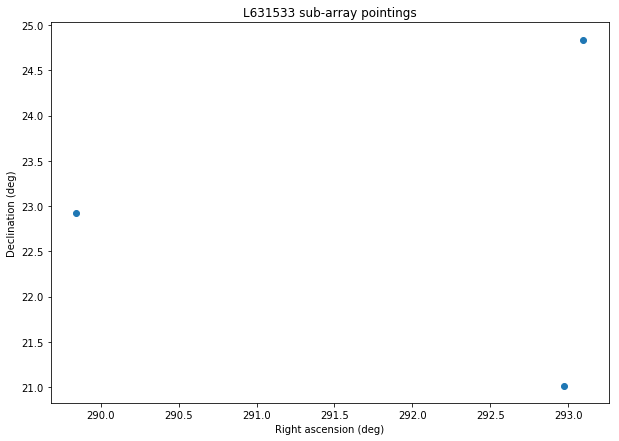

In [31]:
plt.figure(figsize=(10,7))
plt.plot(sap_ra, sap_dec, 'o')
plt.xlabel("Right ascension (deg)")
plt.ylabel("Declination (deg)")
plt.title("L631533 sub-array pointings")

## Exercise 2
Use the code from the previous cells as an example to obtain the pointing right ascension and declination of each beam in each of the three sub-array pointings. Make a plot of all the beam pointings and sub-array pointings.

In [34]:
beamfnames = sorted(glob.glob("data/L??????_SAP???_B???_S0_P000_bf.h5"))

273


In [38]:
beam_ra = []
beam_dec = []
sap_no = []
for beamfname in beamfnames:
    h5 = h5py.File(beamfname, "r")
    sap_ids = [key for key in h5.keys() if "SUB_ARRAY_POINTING" in key]
    for sap_id in sap_ids:
        beam_ids = [key for key in h5[sap_id].keys() if "BEAM" in key]
        for beam_id in beam_ids:
            group_name = sap_id + "/" + beam_id
            beam_ra.append(h5[group_name].attrs['POINT_RA'])
            beam_dec.append(h5[group_name].attrs['POINT_DEC'])

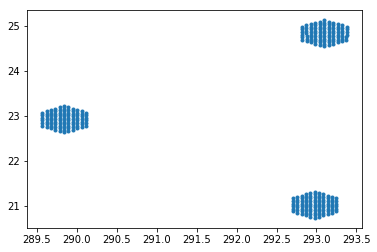

In [39]:
plt.plot(beam_ra, beam_dec, '.')

In [14]:
group = h5["/SUB_ARRAY_POINTING_000"]
keys = sorted(["%s"%item for item in sorted(list(group.attrs))])
for key in keys:
    print(key + " = " + str(group.attrs[key]))

EXPTIME_END_MJD = 58090.629860840534
EXPTIME_END_UTC = b'2017-12-03T15:06:59.976622105Z'
EXPTIME_START_MJD = 58090.62638888889
EXPTIME_START_UTC = b'2017-12-03T15:02:00.000000000Z'
GROUPTYPE = b'SubArrayPointing'
NOF_BEAMS = 1
OBSERVATION_NOF_BEAMS = 91
POINT_DEC = 22.92807
POINT_DEC_UNIT = b'deg'
POINT_RA = 289.839232
POINT_RA_UNIT = b'deg'
TOTAL_INTEGRATION_TIME = 299.97662208
TOTAL_INTEGRATION_TIME_UNIT = b's'
